In [140]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from lmfit import models
from scipy import optimize
from scipy.optimize import curve_fit

In [141]:
data = pd.read_csv('doppler_free_new.csv')
voltage = np.array(data['voltage'])
time = np.array(data['time'])

In [142]:
df = pd.DataFrame({'time': time, 'voltage' : voltage})

df

,time,voltage
0,0.00840,0.372
1,0.00844,0.376
2,0.00848,0.374
3,0.00852,0.376
4,0.00856,0.378
...,...,...
2495,0.10820,0.296
2496,0.10824,0.296
2497,0.10828,0.294
2498,0.10832,0.294


In [143]:
def gaussian(time, A, mu, sigma):
    return A* np.exp(-(time - mu)**2 / (2 * sigma**2))

curve_model = models.Model(gaussian, name="gaussian -peak")




In [144]:
fit_result = curve_model.fit(df['voltage'], time = df['time'], A=-0.5, mu=4200, sigma=2)

(0.025, 0.035)

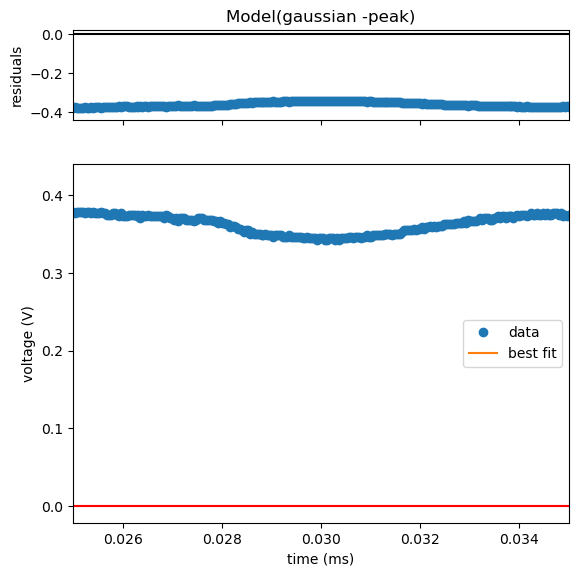

In [145]:
fit_result.plot()
plt.plot(time, fit_result.best_fit, 'r-', label='Fit')
plt.xlabel("time (ms)")
plt.ylabel("voltage (V)")

plt.xlim(0.025, 0.035)


In [146]:
optimize.fmin

<function scipy.optimize._optimize.fmin(func, x0, args=(), xtol=0.0001, ftol=0.0001, maxiter=None, maxfun=None, full_output=0, disp=1, retall=0, callback=None, initial_simplex=None)>

In [147]:
fit_result